[View in Colaboratory](https://colab.research.google.com/github/jamqd/MLProjects/blob/master/lenet5.ipynb)

# LeNet-5 Implementation in Tensorflow for MNIST Digits Dataset

Based on this [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann Lecun, Leon Bottou, Yoshua Benigo, and Ptrick Haffner in 1998. This implementation uses 28x28 input images instaed of 32x32 and uses the ReLU activation function instead of the sigmoid function.

### Documentation of Libraries annd Frameworks


*   [NumPy](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
*   [Matplotlib](https://matplotlib.org/contents.html)
*   [TensorFlow](https://www.tensorflow.org/api_docs/)



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
#import mnist data
(x_train_orig, y_train), (x_test_orig, y_test) = tf.keras.datasets.mnist.load_data()

In [31]:
#dimensions of dataset
print('x_train_orig shape: ' + str(x_train_orig.shape))
print('y_train shape: ' + str(y_train.shape))
print('x_test_orig shape: ' + str(x_test_orig.shape))
print('y_test shape: ' + str(y_test.shape))

#reshape x_train and x_test for convolutions
x_train = tf.reshape(x_train_orig, [-1, 28, 28, 1])
x_test = tf.reshape(x_test_orig, [-1, 28, 28, 1])
print()
print('Reshaped:')
print('x_train shape: ' + str(x_train.shape))
print('x_test shape: ' + str(x_test.shape))

with tf.Session() as sess:
  x_tr, x_te = sess.run([x_train, x_test])

x_train_orig shape: (60000, 28, 28)
y_train shape: (60000,)
x_test_orig shape: (10000, 28, 28)
y_test shape: (10000,)

Reshaped:
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


This is an image of a 5


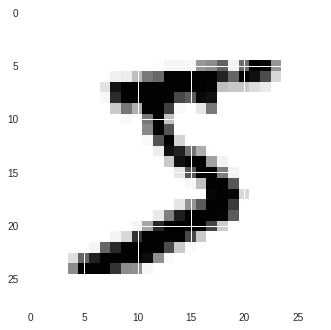

In [32]:
#visualize image from training set
index = 0 #@param {type:"slider", min:0, max:59999, step:1}
print('This is an image of a ' + str(y_train[index]))
plt.imshow(x_train_orig[index])

In [37]:
# resets the tensorflow graph
tf.reset_default_graph() 

# set placeholders for the inputs and outputs
X = tf.placeholder(tf.float32, shape = [None, 28, 28, 1], name = 'X')
Y = tf.placeholder(tf.int64, shape = [None,], name = 'Y')

# convolution 5x5 6 filters
conv1 = tf.layers.conv2d(X, 6, 5, name = 'conv1', activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer())
# average pooling 2x2
pool1 = tf.layers.average_pooling2d(conv1, 2, 2, name = 'pool1')
# convolution 5x5 16 filters
conv2 = tf.layers.conv2d(pool1, 16, 5, name = 'conv2', activation = tf.nn.relu, kernel_initializer = tf.contrib.layers.xavier_initializer())
# average pooling 2x2
pool2 = tf.layers.average_pooling2d(conv2, 2, 2, name = 'pool2')
# flatten last layer to 256 units
pool2_flat = tf.contrib.layers.flatten(pool2)
# fully connected layer 120 units
dense1 = tf.layers.dense(pool2_flat, 120, activation = tf.nn.relu, name = 'dense1', kernel_initializer = tf.contrib.layers.xavier_initializer())
# fully connected layer 84 units
dense2 = tf.layers.dense(pool2_flat, 84, activation = tf.nn.relu, name = 'dense2', kernel_initializer = tf.contrib.layers.xavier_initializer())
# output layer 10 units for 10 digits
logits = tf.layers.dense(dense2, 10, kernel_initializer = tf.contrib.layers.xavier_initializer())

# compute loss and cost
loss = tf.losses.sparse_softmax_cross_entropy(Y,logits)
cost = tf.reduce_mean(loss)

# train using adam optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

# training
epochs = 200 #@param {type:"integer"}
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  for n in range(epochs):
    optim, temp_cost = sess.run([optimizer, cost], feed_dict = {X: x_tr, Y: y_train})
    
    # print cost every 20 epochs
    if n % 20 == 0:
      print('Cost after epoch ' + str(n) + ': ' + str(temp_cost))
  
  #get predictions
  predict_op = tf.argmax(logits, 1)
  correct_prediction = tf.equal(predict_op, Y)
  
  
  #print accuracy on training and test sets
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  train_accuracy = accuracy.eval({X: x_tr, Y: y_train})
  test_accuracy = accuracy.eval({X: x_te, Y: y_test})
  print("Train Accuracy:", train_accuracy)
  print("Test Accuracy:", test_accuracy)
  
  # save test set predictions
  test_pred = predict_op.eval({X: x_te, Y: y_test})

Cost after epoch 0: 10.604112
Cost after epoch 20: 0.88102823
Cost after epoch 40: 0.4258418
Cost after epoch 60: 0.2726057
Cost after epoch 80: 0.20067525
Cost after epoch 100: 0.15993294
Cost after epoch 120: 0.13314919
Cost after epoch 140: 0.114132866
Cost after epoch 160: 0.09968856
Cost after epoch 180: 0.088184066
Train Accuracy: 0.97603333
Test Accuracy: 0.9727


This is a 2
The model predicted a 2


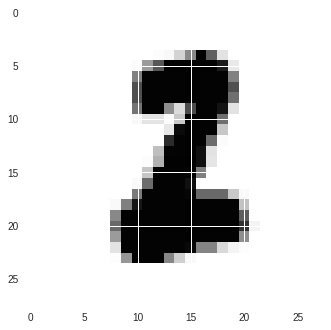

In [45]:
index_test = 0 #@param {type:"slider", min:0, max:9999, step:1}

print('This is a ' + str(y_test[index_test]))
print('The model predicted a ' + str(test_pred[index_test]))
plt.imshow(x_test_orig[index_test])